In [31]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['figure.figsize'] = 10,6

from tensorflow.keras.models import load_model
import tensorflow.keras as K

In [32]:
# Load in the data
data_directory = "/scratch/manderson/numpy/pulses/lib/detector_final/"
X = np.load(data_directory + "test/X_lib_pulses_r20.npy")
Y = np.load(data_directory + "test/y_lib_pulses_r20.npy")

In [33]:
gen_n2c = load_model("saved_models/test_generator_n2c_6")
gen_c2n = load_model("saved_models/test_generator_c2n_6")

/home/nrowe/.local/lib/python3.8/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: networks.generator is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


In [34]:
# # Load Mark's model
# import sys
# sys.path.append("../denoising_code/")
# from neuralnetwork.tensorflow.keras.regularizers import SmoothnessRegularizer

# model_path = "/home/nrowe/tconv_autoencoder_multisite5.h5"
# custom_objects = {"SmoothnessRegularizer": SmoothnessRegularizer, "K": K}
# mark_model = load_model(model_path, custom_objects=custom_objects)

In [35]:
D = gen_n2c.predict(X)

219/219 [==============================] - 45s 192ms/step


In [36]:
N = gen_c2n.predict(Y)

219/219 [==============================] - 43s 192ms/step


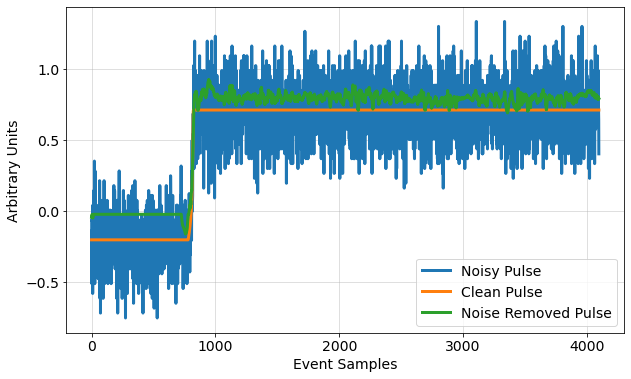

In [37]:
i = 1

plt.plot(X[i], label="Noisy Pulse")
plt.plot(Y[i], label="Clean Pulse")
plt.plot(D[i], label="Noise Removed Pulse")

plt.ylabel("Arbitrary Units")
plt.xlabel("Event Samples")
plt.legend()
plt.show()

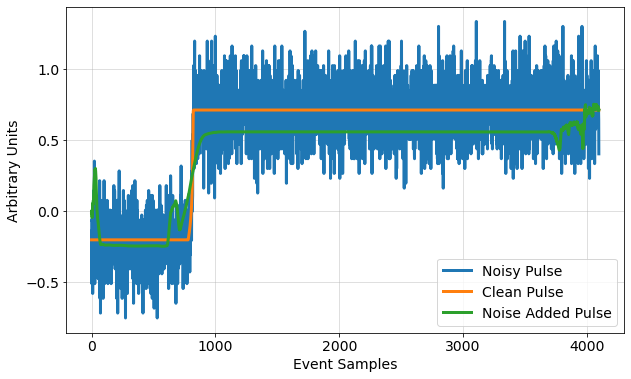

In [38]:
i = 1

plt.plot(X[i], label="Noisy Pulse")
plt.plot(Y[i], label="Clean Pulse")
plt.plot(N[i], label="Noise Added Pulse")

plt.ylabel("Arbitrary Units")
plt.xlabel("Event Samples")
plt.legend()
plt.show()